## Part 2

# Exercises: BA edition
First a couple of questions to make sure that you've actually read the text.

- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

Note:

- $k_{max} = k_{min}N^{\frac{1}{\gamma-1}}$ ($2.1$)

- $\langle d \rangle\sim\begin{cases}
\text{const.} & \gamma=2\\
\ln\ln N & 2<\gamma<3\\
\frac{\ln N}{\ln\ln N} & \gamma=3\\
\ln N & \gamma>3\\
\end{cases}$ ($2.2$)

- $\langle k^{n} \rangle=\sum_{k_{min}}^{\infty}{k^{n}p_{k}}\approx C\frac{k_{max}^{n-\gamma+1}-k_{min}^{n-\gamma+1}}{n-\gamma+1}$ ($2.3$)

1. Anomalous Regime ($\gamma \leq 2$):

    There are two possible cases for this regime, namely the case for $\gamma<2$ and $\gamma=2$. For $\gamma<2$, the exponent $\frac{1}{\gamma-1}$ in ($2.1$) is larger than $1$. This predicts that a node exists with a degree of $k_{max} > N$ and it will run out of nodes to connect to. This shows that a large scale-free network with $\gamma<2$ can't exist unless the network allows multi-link. The average degree $\langle k\rangle$ diverges in the $N \to\infty$ limit.

    The other case for $\gamma=2$, the exponent is equal to 1, meaning that the maximum degree is linearly proportional to the network size, i.e. $k_{max}\sim N$. Similar to hub and spoke configuration, the node with a degree of $k_{max}$ will act as a central hub because it connects to all other nodes in the network. The average path length $\langle d\rangle$ is a constant and doesn't depend on $N$.

1. Scale-Free Regime ($2<\gamma>3$):
    
    With $1<\gamma-1<2$, there are two possible cases for the exponent $n-\gamma+1$ in ($2.2$). For $n=1$, the exponent $n-\gamma+1$ is less than zero, meaning that the first moment of the degree of distribution is finite. While for $n\geq2$, the exponent $n-\gamma+1$ is less than zero, causing the second and higher moments diverge as $N \to\infty$. Since the exponent in ($2.1$) is smaller than $1$, the market share of the largest hub, $\frac{k_{max}}{N}$ decreases as N increases, i.e. $\frac{k_{max}}{N}\sim N^{-\frac{\gamma-2}{\gamma-1}}$.

    Equation ($2.2$) shows that the average path length $\langle d\rangle$ in this regime is $\ln\ln N$ which grows significantly slower than both $\ln N$ and $\frac{\ln N}{\ln\ln N}$. Meaning that scale-free networks in this regime are "ultra-small", as the increase in network size radically reduces path.

1. Random Network Regime $(\gamma>3)$:

    With $\gamma-1>2$, the first ($n=1$) and second ($n=2$) moment of the degree of distribution are finite as the exponent $n-\gamma+1$ in ($2.2$) is less than $1$ for both $n=1, 2$. Consequently, the third and higher degree diverge as $N \to\infty$. Scale-free networks in this regime are "small" and the average path length $\langle d\rangle$ follows the small world result from random networks.
    
    The properties of scale-free networks in this regime are difficult to distinguish from properties of a random network of a similar size. As $\gamma$ increases, it will be harder to differentiate from a random network. This is due to the limited size of the available networks with large degree exponent, making it difficult to obtain convincing evidence of their scale-free nature.

- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:

- First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).

In [2]:
# Create a simple graph consisting of 1 single edge (0, 1)
BA = nx.Graph([(0, 1)])
print("edges: ", BA.edges)

edges:  [(0, 1)]


- Now add another node, connecting one of the existing nodes in proportion to their degree.

In [3]:
# Choose either node 0 or node 1 randomly since both of them has the same degree
random_node = random.choice(list(BA.nodes))

# Add the edge into the network
BA.add_edge(2, random_node)
print("edges: ", BA.edges)

edges:  [(0, 1), (1, 2)]


- Keep going until you have a 100 node network.
    - Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

In [4]:
n = 100
# Add node 3 to n into the network (0, 1, 2 are already in the network)
for node in range(3, n):

    # Flatten the current edges list, which is a [List[List[int, int]]],
    # to represent the degree-based pool
    node_pool = np.array(BA.edges).flatten()

    # Randomly pick a node from the node_pool
    random_node = random.choice(node_pool)
    
    # Add the edge into the network
    BA.add_edge(node, random_node)
print("number of nodes: ", len(BA.nodes))
print("number of edges: ", len(BA.edges))

number of nodes:  100
number of edges:  99


- Plot the network.

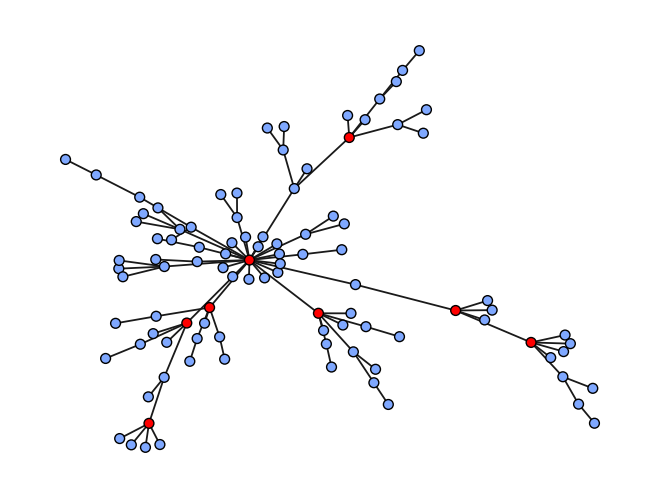

In [5]:
# Get a dictionary for node-degree pair and get max degree
degrees = dict(BA.degree())
degrees_values = list(degrees.values())
max_degree = max(degrees_values)

# Calculate mean and standard deviation for minimum degree to be a hub
mean_degrees = np.mean(degrees_values)
std_degrees = np.std(degrees_values)
hub_degree_criteria = mean_degrees + std_degrees

# Create list of colors based on the hub degree criteria
hub_color = 'red'
default_color = '#7FA8FF'
node_colors = []
for node in BA.nodes():
    if degrees[node] >= hub_degree_criteria:
        node_colors.append(hub_color)
    else:
        node_colors.append(default_color)

nx.draw_spring(BA, node_size=50, with_labels=False, node_color=node_colors, node_shape='o', edge_color='.1', width=1.3, edgecolors='black')

**Figure 1.2.1**

The figure shows the plot of a scale-free network using the Barabasi-Albert model with n=100 and m=1. The red nodes represent the hubs, whose degree is larger than or equal to the mean degree plus one standard deviation ($\mu + \sigma$).

- Add more nodes until you have a 5000 node network.

In [6]:
n = 5000
# Add node 100 to n into the network (0 to 99 are already in the network)
for node in range(100, n):

    # Flatten the current edges list, which is a [List[List[int, int]]],
    # to represent the degree-based pool
    node_pool = np.array(BA.edges).flatten()

    # Randomly pick a node from the node_pool
    random_node = random.choice(node_pool)
    
    # Add the edge into the network
    BA.add_edge(node, random_node)
print("number of nodes: ", len(BA.nodes))
print("number of edges: ", len(BA.edges))


number of nodes:  5000
number of edges:  4999


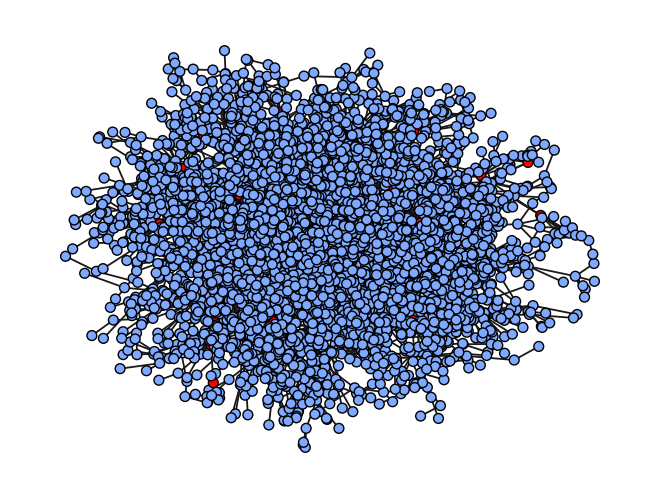

In [7]:
# Get a dictionary for node-degree pair and get max degree
degrees = dict(BA.degree())
degrees_values = list(degrees.values())
max_degree = max(degrees_values)

# Calculate mean and standard deviation for minimum degree to be a hub
mean_degrees = np.mean(degrees_values)
std_degrees = np.std(degrees_values)
hub_degree_criteria = mean_degrees + std_degrees

# Create list of colors based on the hub degree criteria
hub_color = 'red'
default_color = '#7FA8FF'
node_colors = []
for node in BA.nodes():
    if degrees[node] >= hub_degree_criteria:
        node_colors.append(hub_color)
    else:
        node_colors.append(default_color)

# Plot
nx.draw_spring(BA, node_size=50, with_labels=False, node_color=node_colors, node_shape='o', edge_color='.1', width=1.3, edgecolors='black')

**Figure 1.2.2**

The figure shows the plot of a scale-free network using the Barabasi-Albert model with n=5000 and m=1. The red nodes represent the hubs, whose degree is larger than or equal to the mean degree plus one standard deviation ($\mu + \sigma$).

- What's the maximum and minimum degree?

In [8]:
# Get all the degree for each node
degree_list = [BA.degree[node] for node in BA.nodes]

# Store frequency of each degree:
# x = unique degree values
# y = number of nodes that have each degree
x, y = np.unique(degree_list, return_counts=True)
max_degree, min_degree = max(y), min(y)
print("maximum degree: ", max_degree)
print("minimum degree: ", min_degree)

maximum degree:  3303
minimum degree:  1


- Now, bin the degree distribution using numpy.histogram.

In [9]:
# Use numpy.histogram to get histogram values
hist, bins = np.histogram(degree_list, bins=120)

assert len(hist) == len(bins) - 1
# bins contains the edges of each bin, so it has one more element than hist
# Calculate the center of each bin for the x-axis values
bin_centers = (bins[:-1] + bins[1:]) / 2

- Plot the distribution. Plot it with both linear and log-log axes.

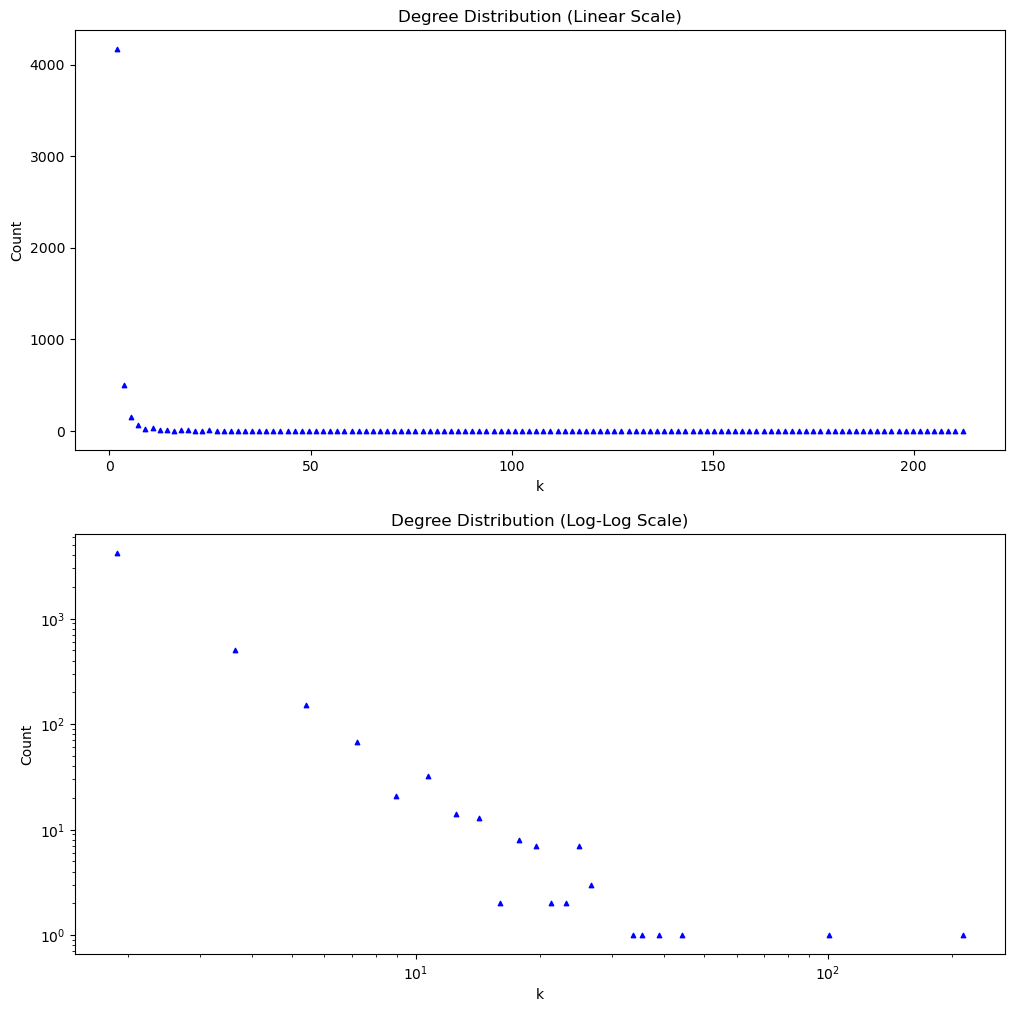

In [10]:
fig, axs = plt.subplots(2, figsize=(12,12))

# Linear axis plot
axs[0].scatter(bin_centers, hist, color='blue', s=10, marker='^')
axs[0].set_title("Degree Distribution (Linear Scale)")
axs[0].set_xlabel("k")
axs[0].set_ylabel("Count")

# Log-log axis plot
axs[1].scatter(bin_centers, hist, color='blue', s=10, marker='^')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title("Degree Distribution (Log-Log Scale)")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Count")
plt.show()

**Figure 1.2.3**